In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset=pd.read_csv('PCOS Dataset.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[15])],remainder='passthrough') 
X=np.array(ct.fit_transform(X))
print(X.shape)

(95, 32)



splitting into train and test datasets

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale_indexes = [3, 4, 5, 6, 7, 16, 18, 33]
X_train[:,scale_indexes]=sc.fit_transform(X_train[:,scale_indexes]) 
X_test[:,scale_indexes]=sc.transform(X_test[:,scale_indexes])
print (X_test)

Text(0, 0.5, 'Height')

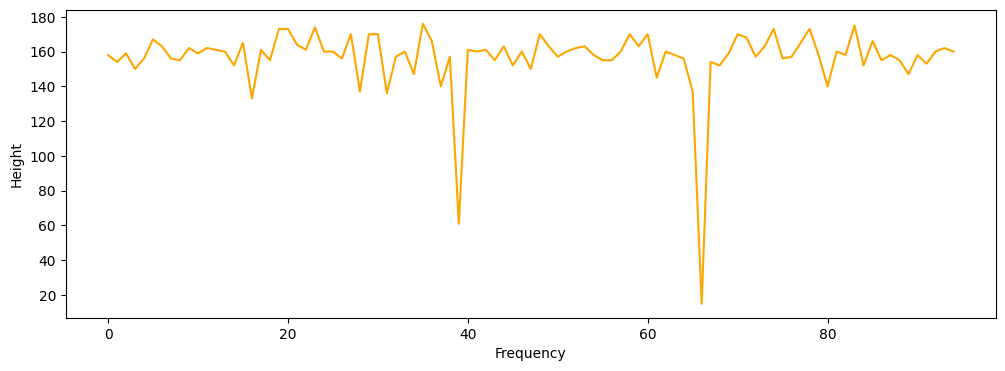

In [8]:
plt.figure(figsize=(12,4))
plt.plot(dataset['Height'],c='Orange')
plt.xlabel('Frequency')
plt.ylabel('Height')

In [14]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=1, max_iter=1000)  # Increased max_iter for convergence as it is a large data set
#TOTAL NO. OF ITERATIONS REACHED LIMIT.   (so use max_iter)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(y_pred)

[1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1]


In [15]:
#accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8421052631578947

Confusion Matrix:
 [[10  1]
 [ 2  6]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.86      0.75      0.80         8

    accuracy                           0.84        19
   macro avg       0.85      0.83      0.83        19
weighted avg       0.84      0.84      0.84        19



In [33]:
#RainForest 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Focus on maximizing recall for Class 1
scorer = make_scorer(recall_score, pos_label=1)

params = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
}

grid_search = GridSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=1),
    params,
    scoring=scorer,
    cv=5
)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred_rf = grid_search.predict(X_test)

# Print metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8947368421052632

Confusion Matrix:
 [[10  1]
 [ 1  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.88      0.88      0.88         8

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19



In [35]:
import numpy as np
print("Class counts:", np.bincount(y_train))

Class counts: [44 32]
